<a href="https://colab.research.google.com/github/srisharaj/srisharaj/blob/main/EDA_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Getting all the packages we need: 

import numpy as np # linear algebra
import pandas as pd # data processing

import seaborn as sns #statist graph package
import matplotlib.pyplot as plt #plot package

import wordcloud #will use for the word cloud plot
from wordcloud import WordCloud, STOPWORDS # optional to filter out the stopwords

#Optional helpful plot stypes:
plt.style.use('bmh') #setting up 'bmh' as "Bayesian Methods for Hackers" style sheet
#plt.style.use('ggplot') #R ggplot stype


In [ ]:
df = pd.read_csv('/content/r_dataisbeautiful_posts.csv')

In [ ]:
df.sample(5)

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
5429,k1s3q0,Rejection of a potential partner of the opposi...,1,Alive_Cod_4559,NaN,moderator,0.0,[],1606442042,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
7038,jps8df,Countries based on their land size,1,Ted_Rose26,NaN,NaN,0.0,[],1604761242,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
12893,ims1i0,[OC] Effective reproductive rate (Rt) of COVID...,1,samuelreh,NaN,NaN,0.0,[],1599267309,https://www.reddit.com/r/dataisbeautiful/comme...,5,False
3517,kjkv7b,Find Your Relationship Attachment Style,1,AYTechTv,NaN,moderator,0.0,[],1608836868,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
5003,k5hw28,[OC] Names of hamburgers throughout the U.S,1,gabereyn,NaN,NaN,0.0,[],1606941660,https://www.reddit.com/r/dataisbeautiful/comme...,34,False


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18014 entries, 0 to 18013
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     18014 non-null  object 
 1   title                  18014 non-null  object 
 2   score                  18014 non-null  int64  
 3   author                 18014 non-null  object 
 4   author_flair_text      4488 non-null   object 
 5   removed_by             7782 non-null   object 
 6   total_awards_received  18014 non-null  float64
 7   awarders               18014 non-null  object 
 8   created_utc            18014 non-null  int64  
 9   full_link              18014 non-null  object 
 10  num_comments           18014 non-null  int64  
 11  over_18                18013 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.6+ MB


,score,total_awards_received,created_utc,num_comments
count,18014.000000,18014.000000,1.801400e+04,18014.000000
mean,48.593372,0.038081,1.603298e+09,43.378039
std,1310.442097,1.101769,5.166102e+06,306.737252
min,0.000000,0.000000,1.595076e+09,0.000000
25%,1.000000,0.000000,1.598834e+09,2.000000
50%,1.000000,0.000000,1.602969e+09,2.000000
75%,1.000000,0.000000,1.607608e+09,8.000000
max,69779.000000,93.000000,1.613474e+09,12508.000000


In [ ]:
print("Data shape :",df.shape)

Data shape : (18014, 12)


In [ ]:
df.isnull().sum().sort_values(ascending = False)

author_flair_text        13526
removed_by               10232
over_18                      1
id                           0
title                        0
score                        0
author                       0
total_awards_received        0
awarders                     0
created_utc                  0
full_link                    0
num_comments                 0
dtype: int64

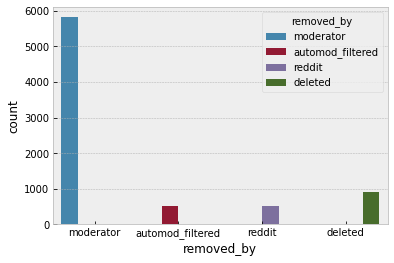

In [ ]:
sns.countplot(x = 'removed_by', hue = 'removed_by', data = df)

In [ ]:
df["title"] = df["title"].fillna(value="")

In [ ]:
word_string=" ".join(df['title'].str.lower())

(-0.5, 1599.5, 799.5, -0.5)

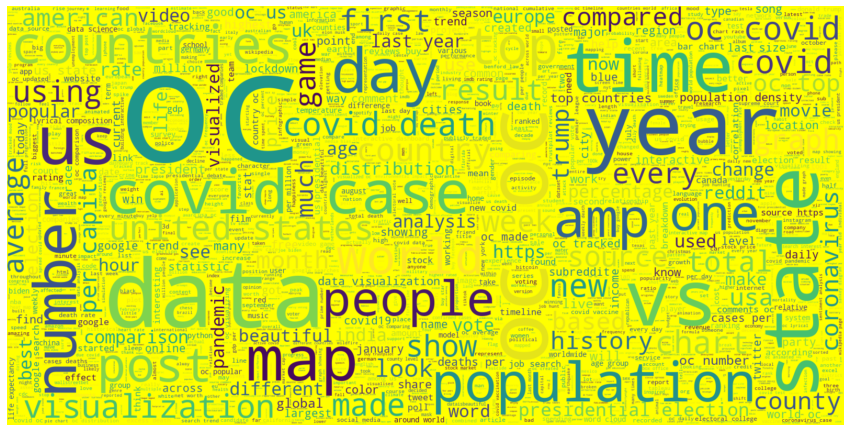

In [ ]:
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="yellow", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


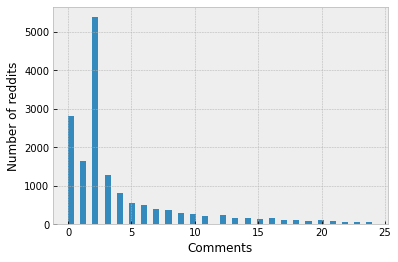

In [ ]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["num_comments"] < 25]["num_comments"], kde=False, rug=False, hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="num_comments", ylabel="id")

plt.ylabel("Number of reddits")
plt.xlabel("Comments")

plt.show()

In [ ]:
df.corr()

,score,total_awards_received,created_utc,num_comments
score,1.000000,0.717727,-0.007678,0.351103
total_awards_received,0.717727,1.000000,0.028589,0.222466
created_utc,-0.007678,0.028589,1.000000,-0.008772
num_comments,0.351103,0.222466,-0.008772,1.000000


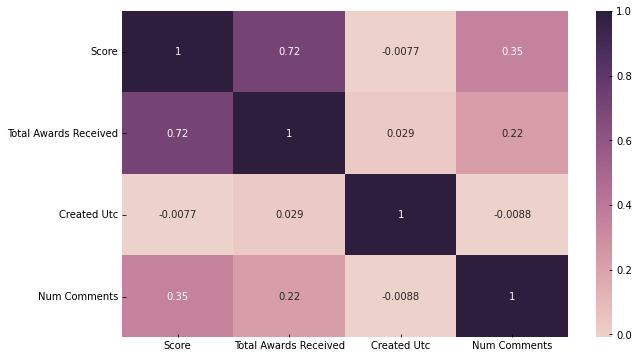

In [ ]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)